# IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re

# IMPORT DATASETS

In [2]:
df_pendapatan_bersih = pd.read_csv("https://drive.google.com/uc?id=1O2-FPmjDkp8sDs9fyX7F_GEgzCfq6u0O")
df_penyelesaian_pendidikan = pd.read_csv("https://drive.google.com/uc?id=1pkZUiUeMicRdm46QBgqQMoRGvFsZ5Tdh")
df_tindak_pidana_2021_2023 = pd.read_csv("https://drive.google.com/uc?id=1ophMapb0WUjmCRkmeQbUlp2jKlqyCcp2")
df_tindak_pidana_2018_2020 = pd.read_csv("https://drive.google.com/uc?id=1jdyIXkF08X1jFBuVET7M07ydXiIMYxQH")
df_tindak_pidana_2015_2017 = pd.read_csv("https://drive.google.com/uc?id=1Uhr7BtiFpUyB5t60PqwkPFhaTzKtwmGh")
df_tindak_pidana_2012_2014 = pd.read_csv("https://drive.google.com/uc?id=1AB-5AZ5a2cSzoo_I9z7UYFJKgjijN6sP")
df_gini_ratio = pd.read_csv("https://drive.google.com/uc?id=1tqHMqqk_j5ALRxR1h06sBocPycyae4TO")
df_jumlah_penduduk = pd.read_csv("https://drive.google.com/uc?id=1kb1JNofNLh0RkZbhM3QFmAfXD6LTg0b0")

# PREPROCESSING

In [3]:
def standardize_number(value):
    value = str(value)
    if ',' in value and '.' in value:
        if value.index(',') < value.index('.'):
            # US format: "1,614.70" → Remove ","
            value = value.replace(',', '')
        else:
            # European format: "1.363,1" → Remove "." and replace "," with "."
            value = value.replace('.', '').replace(',', '.')

    # Case 2: If only ',' exists, assume European format: "1363,1" → "1363.1"
    elif ',' in value:
        value = value.replace(',', '.')

    # Case 3: If only '.' exists, assume it's a normal decimal number
    # (no change needed)

    try:
        return float(value)  # Convert to float
    except ValueError:
        return None  # Handle non-numeric values gracefully


### df_tindak_pidana_time_series

In [4]:
df_tindak_pidana_2021_2023 = df_tindak_pidana_2021_2023.rename(columns={'Provinsi': 'Kepolisian Daerah'})

In [5]:
df_tindak_pidana_time_series = df_tindak_pidana_2012_2014.merge(df_tindak_pidana_2015_2017, on='Kepolisian Daerah', how='outer')
df_tindak_pidana_time_series = df_tindak_pidana_time_series.merge(df_tindak_pidana_2018_2020, on='Kepolisian Daerah', how='outer')
df_tindak_pidana_time_series = df_tindak_pidana_time_series.merge(df_tindak_pidana_2021_2023, on='Kepolisian Daerah', how='outer')

In [6]:
df_tindak_pidana_time_series = df_tindak_pidana_time_series.rename(columns={'Kepolisian Daerah': 'Provinsi'})

### df_2023

In [7]:
provinces_to_drop = ['PAPUA BARAT DAYA', 'PAPUA SELATAN', 'PAPUA TENGAH', 'PAPUA PEGUNUNGAN']
df_penyelesaian_pendidikan = df_penyelesaian_pendidikan[~df_penyelesaian_pendidikan['Provinsi'].isin(provinces_to_drop)]
df_penyelesaian_pendidikan = df_penyelesaian_pendidikan.replace(re.escape("KEP."), "KEPULAUAN", regex=True)

In [8]:
df_pendapatan_bersih

,Provinsi,Unnamed: 1,Rata-rata Feb 2023,Rata-rata Aug 2023
0,Aceh,NaN,2 294 901,2594529.697
1,Sumatera Utara,NaN,2 393 548,2610583.681
2,Sumatera Barat,NaN,2 603 514,2753516.957
3,Riau,NaN,2 872 526,3011039.924
4,Jambi,NaN,2 524 049,2668478.458
5,Sumatera Selatan,NaN,2 606 420,2767669.235
6,Bengkulu,NaN,2 363 579,2740734.246
7,Lampung,NaN,2 193 447,2424538.339
8,Kepulauan Bangka Belitung,NaN,2 986 225,3221747.229
9,Kepulauan Riau,NaN,4 143 219,4651057.076


In [9]:
df_pendapatan_bersih = df_pendapatan_bersih.drop(columns='Unnamed: 1', errors='ignore')
df_pendapatan_bersih['Provinsi'] = df_pendapatan_bersih['Provinsi'].str.upper().str.strip()

In [10]:
df_tindak_pidana_2021_2023 = df_tindak_pidana_2021_2023.replace(re.escape("METRO JAYA"), "DKI JAKARTA", regex=True)
df_tindak_pidana_2021_2023 = df_tindak_pidana_2021_2023.replace(re.escape("KEP."), "KEPULAUAN", regex=True)
df_tindak_pidana_2021_2023 = df_tindak_pidana_2021_2023.rename(columns={'Kepolisian Daerah': 'Provinsi'})

In [11]:
df_gini_ratio = df_gini_ratio.replace(re.escape("KEP."), "KEPULAUAN", regex=True)
df_gini_ratio = df_gini_ratio.rename(columns={'2023': 'gini_ratio_2023'})

In [12]:
df_jumlah_penduduk["Provinsi"] = df_jumlah_penduduk["Provinsi"].str.upper().str.strip()

In [13]:
df_2023 = df_pendapatan_bersih.merge(df_penyelesaian_pendidikan, on='Provinsi', how='outer')
df_2023 = df_2023.merge(df_tindak_pidana_2021_2023, on='Provinsi', how='outer')
df_2023 = df_2023.merge(df_gini_ratio, on='Provinsi', how='outer')
df_2023 = df_2023.merge(df_jumlah_penduduk, on='Provinsi', how='outer')

In [14]:
df_jumlah_penduduk

,Provinsi,Jumlah Penduduk (Ribu)
0,ACEH,5482.5
1,SUMATERA UTARA,15386.6
2,SUMATERA BARAT,5757.2
3,RIAU,6642.9
4,JAMBI,3679.2
5,SUMATERA SELATAN,8743.5
6,BENGKULU,2086.0
7,LAMPUNG,9314.0
8,KEPULAUAN BANGKA BELITUNG,1511.9
9,KEPULAUAN RIAU,2152.6


In [15]:
df_2023 = df_2023.dropna(subset=['Provinsi'])

In [16]:
df_2023

,Provinsi,Rata-rata Feb 2023,Rata-rata Aug 2023,SD_2021,SD_2022,SD_2023,SMP_2021,SMP_2022,SMP_2023,SMA_2021,SMA_2022,SMA_2023,2021,2022,2023,gini_ratio_2023,Jumlah Penduduk (Ribu)
0,ACEH,2 294 901,2594529.697,99.44,99.45,99.08,93.43,97.63,94.55,74.36,70.67,74.46,125,190,216,0.296,5482.5
1,BALI,3 200 254,3380839.733,97.02,97.55,98.43,94.26,94.15,93.03,75.86,76.59,76.51,55,144,295,0.362,4404.3
2,BANTEN,3 732 183,4378057.554,98.82,97.24,97.15,90.63,92.65,90.86,66.9,66.02,70.07,27,42,105,0.368,12307.7
3,BENGKULU,2 363 579,2740734.246,98.16,97.65,97.1,89.94,90.81,89.25,62.46,64.88,63.41,177,179,290,0.333,2086.0
4,DI YOGYAKARTA,2 374 873,2705600.832,98.48,98.91,98.95,94.94,97.06,97.02,90.12,87.92,89.69,123,285,320,0.449,3736.5
5,DKI JAKARTA,5 071 094,5532624.092,99.26,98.58,98.66,95,95.4,95.85,84.98,87.71,88.1,277,307,357,0.431,10672.1
6,GORONTALO,2 590 343,2570180.707,93.44,95.12,93.69,81.22,80.56,83.71,53.73,45.12,46.19,208,211,314,0.417,1213.2
7,INDONESIA,2 944 541,3178227.238,97.37,97.82,97.83,88.88,90.13,90.44,65.94,66.13,66.79,90,137,214,0.388,278696.2
8,JAMBI,2 524 049,2668478.458,98.54,97.62,97.76,89,86.57,89.35,64.51,65.85,66.62,104,149,192,0.343,3679.2
9,JAWA BARAT,3 333 558,3674236.007,98.45,99.08,99.09,88.18,89.29,91.42,64.89,67.05,66.47,15,60,108,0.425,49860.3


In [17]:
# df_2023.loc[:, df_2023.columns != "Provinsi"] = df_2023.loc[:, df_2023.columns != "Provinsi"].applymap(standardize_number)



In [18]:
df_2023

,Provinsi,Rata-rata Feb 2023,Rata-rata Aug 2023,SD_2021,SD_2022,SD_2023,SMP_2021,SMP_2022,SMP_2023,SMA_2021,SMA_2022,SMA_2023,2021,2022,2023,gini_ratio_2023,Jumlah Penduduk (Ribu)
0,ACEH,2 294 901,2594529.697,99.44,99.45,99.08,93.43,97.63,94.55,74.36,70.67,74.46,125,190,216,0.296,5482.5
1,BALI,3 200 254,3380839.733,97.02,97.55,98.43,94.26,94.15,93.03,75.86,76.59,76.51,55,144,295,0.362,4404.3
2,BANTEN,3 732 183,4378057.554,98.82,97.24,97.15,90.63,92.65,90.86,66.9,66.02,70.07,27,42,105,0.368,12307.7
3,BENGKULU,2 363 579,2740734.246,98.16,97.65,97.1,89.94,90.81,89.25,62.46,64.88,63.41,177,179,290,0.333,2086.0
4,DI YOGYAKARTA,2 374 873,2705600.832,98.48,98.91,98.95,94.94,97.06,97.02,90.12,87.92,89.69,123,285,320,0.449,3736.5
5,DKI JAKARTA,5 071 094,5532624.092,99.26,98.58,98.66,95,95.4,95.85,84.98,87.71,88.1,277,307,357,0.431,10672.1
6,GORONTALO,2 590 343,2570180.707,93.44,95.12,93.69,81.22,80.56,83.71,53.73,45.12,46.19,208,211,314,0.417,1213.2
7,INDONESIA,2 944 541,3178227.238,97.37,97.82,97.83,88.88,90.13,90.44,65.94,66.13,66.79,90,137,214,0.388,278696.2
8,JAMBI,2 524 049,2668478.458,98.54,97.62,97.76,89,86.57,89.35,64.51,65.85,66.62,104,149,192,0.343,3679.2
9,JAWA BARAT,3 333 558,3674236.007,98.45,99.08,99.09,88.18,89.29,91.42,64.89,67.05,66.47,15,60,108,0.425,49860.3


In [19]:
df_2023['Rata-rata Feb 2023'] = df_2023['Rata-rata Feb 2023'].str.replace(' ', '', regex=False)
df_2023['Rata-rata Feb 2023'] = pd.to_numeric(df_2023['Rata-rata Feb 2023'])
df_2023 = df_2023.apply(pd.to_numeric, errors="ignore")

<ipython-input-19-49624886dee5>:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_2023 = df_2023.apply(pd.to_numeric, errors="ignore")


In [20]:
df_2023.dtypes

,0
Provinsi,object
Rata-rata Feb 2023,int64
Rata-rata Aug 2023,float64
SD_2021,float64
SD_2022,float64
SD_2023,float64
SMP_2021,float64
SMP_2022,float64
SMP_2023,float64
SMA_2021,float64


In [21]:
df_2023

,Provinsi,Rata-rata Feb 2023,Rata-rata Aug 2023,SD_2021,SD_2022,SD_2023,SMP_2021,SMP_2022,SMP_2023,SMA_2021,SMA_2022,SMA_2023,2021,2022,2023,gini_ratio_2023,Jumlah Penduduk (Ribu)
0,ACEH,2294901,2594529.697,99.44,99.45,99.08,93.43,97.63,94.55,74.36,70.67,74.46,125,190,216,0.296,5482.5
1,BALI,3200254,3380839.733,97.02,97.55,98.43,94.26,94.15,93.03,75.86,76.59,76.51,55,144,295,0.362,4404.3
2,BANTEN,3732183,4378057.554,98.82,97.24,97.15,90.63,92.65,90.86,66.90,66.02,70.07,27,42,105,0.368,12307.7
3,BENGKULU,2363579,2740734.246,98.16,97.65,97.10,89.94,90.81,89.25,62.46,64.88,63.41,177,179,290,0.333,2086.0
4,DI YOGYAKARTA,2374873,2705600.832,98.48,98.91,98.95,94.94,97.06,97.02,90.12,87.92,89.69,123,285,320,0.449,3736.5
5,DKI JAKARTA,5071094,5532624.092,99.26,98.58,98.66,95.00,95.40,95.85,84.98,87.71,88.10,277,307,357,0.431,10672.1
6,GORONTALO,2590343,2570180.707,93.44,95.12,93.69,81.22,80.56,83.71,53.73,45.12,46.19,208,211,314,0.417,1213.2
7,INDONESIA,2944541,3178227.238,97.37,97.82,97.83,88.88,90.13,90.44,65.94,66.13,66.79,90,137,214,0.388,278696.2
8,JAMBI,2524049,2668478.458,98.54,97.62,97.76,89.00,86.57,89.35,64.51,65.85,66.62,104,149,192,0.343,3679.2
9,JAWA BARAT,3333558,3674236.007,98.45,99.08,99.09,88.18,89.29,91.42,64.89,67.05,66.47,15,60,108,0.425,49860.3


In [22]:
df_2023 = df_2023.rename(columns={"2021": "Tindak Pidana 2021", "2022": "Tindak Pidana 2022", "2023": "Tindak Pidana 2023", "Rata-rata Feb 2023": "Pendapatan Februari", "Rata-rata Aug 2023": "Pendapatan Agustus", "Jumlah Penduduk (Ribu)": "Jumlah Penduduk"})

In [23]:
df_asli = df_2023[["Provinsi", "Pendapatan Februari", "Pendapatan Agustus", "SD_2023", "SMP_2023", "SMA_2023", "Tindak Pidana 2021", "Tindak Pidana 2022", "Tindak Pidana 2023", "gini_ratio_2023", "Jumlah Penduduk"]]

In [24]:
df_asli

,Provinsi,Pendapatan Februari,Pendapatan Agustus,SD_2023,SMP_2023,SMA_2023,Tindak Pidana 2021,Tindak Pidana 2022,Tindak Pidana 2023,gini_ratio_2023,Jumlah Penduduk
0,ACEH,2294901,2594529.697,99.08,94.55,74.46,125,190,216,0.296,5482.5
1,BALI,3200254,3380839.733,98.43,93.03,76.51,55,144,295,0.362,4404.3
2,BANTEN,3732183,4378057.554,97.15,90.86,70.07,27,42,105,0.368,12307.7
3,BENGKULU,2363579,2740734.246,97.10,89.25,63.41,177,179,290,0.333,2086.0
4,DI YOGYAKARTA,2374873,2705600.832,98.95,97.02,89.69,123,285,320,0.449,3736.5
5,DKI JAKARTA,5071094,5532624.092,98.66,95.85,88.10,277,307,357,0.431,10672.1
6,GORONTALO,2590343,2570180.707,93.69,83.71,46.19,208,211,314,0.417,1213.2
7,INDONESIA,2944541,3178227.238,97.83,90.44,66.79,90,137,214,0.388,278696.2
8,JAMBI,2524049,2668478.458,97.76,89.35,66.62,104,149,192,0.343,3679.2
9,JAWA BARAT,3333558,3674236.007,99.09,91.42,66.47,15,60,108,0.425,49860.3


In [25]:
df_asli.isna().sum()

,0
Provinsi,0
Pendapatan Februari,0
Pendapatan Agustus,0
SD_2023,0
SMP_2023,0
SMA_2023,0
Tindak Pidana 2021,0
Tindak Pidana 2022,0
Tindak Pidana 2023,0
gini_ratio_2023,0


In [26]:
df_asli["Tidak Tamat SD"] = 100 - df_asli["SD_2023"]
df_asli["Pendidikan Terakhir SD"] = df_asli["SD_2023"] - df_asli["SMP_2023"]
df_asli["Pendidikan Terakhir SMP"] = df_asli["SMP_2023"] - df_asli["SMA_2023"]
df_asli["Pendidikan Terakhir SMA/PT"] = df_asli["SMA_2023"]

<ipython-input-26-b80da71aa362>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asli["Tidak Tamat SD"] = 100 - df_asli["SD_2023"]
<ipython-input-26-b80da71aa362>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asli["Pendidikan Terakhir SD"] = df_asli["SD_2023"] - df_asli["SMP_2023"]
<ipython-input-26-b80da71aa362>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [27]:
df_asli

,Provinsi,Pendapatan Februari,Pendapatan Agustus,SD_2023,SMP_2023,SMA_2023,Tindak Pidana 2021,Tindak Pidana 2022,Tindak Pidana 2023,gini_ratio_2023,Jumlah Penduduk,Tidak Tamat SD,Pendidikan Terakhir SD,Pendidikan Terakhir SMP,Pendidikan Terakhir SMA/PT
0,ACEH,2294901,2594529.697,99.08,94.55,74.46,125,190,216,0.296,5482.5,0.92,4.53,20.09,74.46
1,BALI,3200254,3380839.733,98.43,93.03,76.51,55,144,295,0.362,4404.3,1.57,5.40,16.52,76.51
2,BANTEN,3732183,4378057.554,97.15,90.86,70.07,27,42,105,0.368,12307.7,2.85,6.29,20.79,70.07
3,BENGKULU,2363579,2740734.246,97.10,89.25,63.41,177,179,290,0.333,2086.0,2.90,7.85,25.84,63.41
4,DI YOGYAKARTA,2374873,2705600.832,98.95,97.02,89.69,123,285,320,0.449,3736.5,1.05,1.93,7.33,89.69
5,DKI JAKARTA,5071094,5532624.092,98.66,95.85,88.10,277,307,357,0.431,10672.1,1.34,2.81,7.75,88.10
6,GORONTALO,2590343,2570180.707,93.69,83.71,46.19,208,211,314,0.417,1213.2,6.31,9.98,37.52,46.19
7,INDONESIA,2944541,3178227.238,97.83,90.44,66.79,90,137,214,0.388,278696.2,2.17,7.39,23.65,66.79
8,JAMBI,2524049,2668478.458,97.76,89.35,66.62,104,149,192,0.343,3679.2,2.24,8.41,22.73,66.62
9,JAWA BARAT,3333558,3674236.007,99.09,91.42,66.47,15,60,108,0.425,49860.3,0.91,7.67,24.95,66.47


In [28]:
df_asli = df_asli[["Provinsi", "Pendapatan Februari", "Pendapatan Agustus", "SD_2023", "SMP_2023", "SMA_2023", "Tidak Tamat SD",	"Pendidikan Terakhir SD",	"Pendidikan Terakhir SMP",	"Pendidikan Terakhir SMA/PT", "Tindak Pidana 2021", "Tindak Pidana 2022", "Tindak Pidana 2023", "gini_ratio_2023", "Jumlah Penduduk"]]

In [29]:
df_asli

,Provinsi,Pendapatan Februari,Pendapatan Agustus,SD_2023,SMP_2023,SMA_2023,Tidak Tamat SD,Pendidikan Terakhir SD,Pendidikan Terakhir SMP,Pendidikan Terakhir SMA/PT,Tindak Pidana 2021,Tindak Pidana 2022,Tindak Pidana 2023,gini_ratio_2023,Jumlah Penduduk
0,ACEH,2294901,2594529.697,99.08,94.55,74.46,0.92,4.53,20.09,74.46,125,190,216,0.296,5482.5
1,BALI,3200254,3380839.733,98.43,93.03,76.51,1.57,5.40,16.52,76.51,55,144,295,0.362,4404.3
2,BANTEN,3732183,4378057.554,97.15,90.86,70.07,2.85,6.29,20.79,70.07,27,42,105,0.368,12307.7
3,BENGKULU,2363579,2740734.246,97.10,89.25,63.41,2.90,7.85,25.84,63.41,177,179,290,0.333,2086.0
4,DI YOGYAKARTA,2374873,2705600.832,98.95,97.02,89.69,1.05,1.93,7.33,89.69,123,285,320,0.449,3736.5
5,DKI JAKARTA,5071094,5532624.092,98.66,95.85,88.10,1.34,2.81,7.75,88.10,277,307,357,0.431,10672.1
6,GORONTALO,2590343,2570180.707,93.69,83.71,46.19,6.31,9.98,37.52,46.19,208,211,314,0.417,1213.2
7,INDONESIA,2944541,3178227.238,97.83,90.44,66.79,2.17,7.39,23.65,66.79,90,137,214,0.388,278696.2
8,JAMBI,2524049,2668478.458,97.76,89.35,66.62,2.24,8.41,22.73,66.62,104,149,192,0.343,3679.2
9,JAWA BARAT,3333558,3674236.007,99.09,91.42,66.47,0.91,7.67,24.95,66.47,15,60,108,0.425,49860.3


In [30]:
df_asli.describe()

,Pendapatan Februari,Pendapatan Agustus,SD_2023,SMP_2023,SMA_2023,Tidak Tamat SD,Pendidikan Terakhir SD,Pendidikan Terakhir SMP,Pendidikan Terakhir SMA/PT,Tindak Pidana 2021,Tindak Pidana 2022,Tindak Pidana 2023,gini_ratio_2023,Jumlah Penduduk
count,3.500000e+01,3.500000e+01,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,2.926495e+06,3.133661e+06,96.777429,89.577429,65.840286,3.222571,7.200000,23.737143,65.840286,128.885714,168.085714,254.857143,0.345571,15925.494286
std,6.710463e+05,7.374697e+05,3.338781,5.373796,10.530752,3.338781,2.950269,6.717711,10.530752,67.324837,82.764148,116.691938,0.046740,47130.311315
min,2.117920e+06,2.321344e+06,80.090000,67.120000,39.500000,0.910000,1.930000,7.330000,39.500000,15.000000,42.000000,105.000000,0.245000,730.000000
25%,2.455084e+06,2.651131e+06,96.095000,88.135000,61.700000,1.575000,4.815000,20.440000,61.700000,90.500000,119.500000,169.000000,0.315000,2417.050000
50%,2.825303e+06,2.876321e+06,97.830000,90.440000,66.790000,2.170000,7.670000,23.130000,66.790000,115.000000,141.000000,235.000000,0.340000,4404.300000
75%,3.208832e+06,3.352148e+06,98.425000,92.990000,69.515000,3.905000,8.725000,28.100000,69.515000,167.500000,190.500000,307.500000,0.373000,9028.750000
max,5.071094e+06,5.532624e+06,99.090000,97.020000,89.690000,19.910000,13.770000,39.020000,89.690000,289.000000,364.000000,589.000000,0.449000,278696.200000


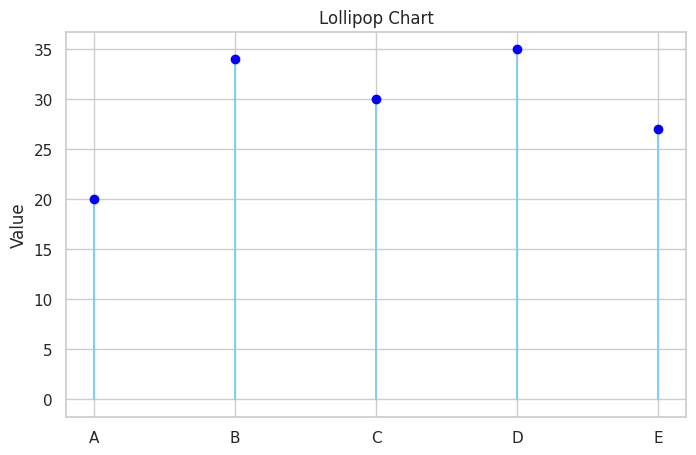

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data
categories = ['A', 'B', 'C', 'D', 'E']
values = [20, 34, 30, 35, 27]

# Plot
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")

# Draw stems
for i in range(len(categories)):
    plt.plot([categories[i], categories[i]], [0, values[i]], color='skyblue')
    plt.plot(categories[i], values[i], "o", color='blue')

plt.title("Lollipop Chart")
plt.ylabel("Value")
plt.show()


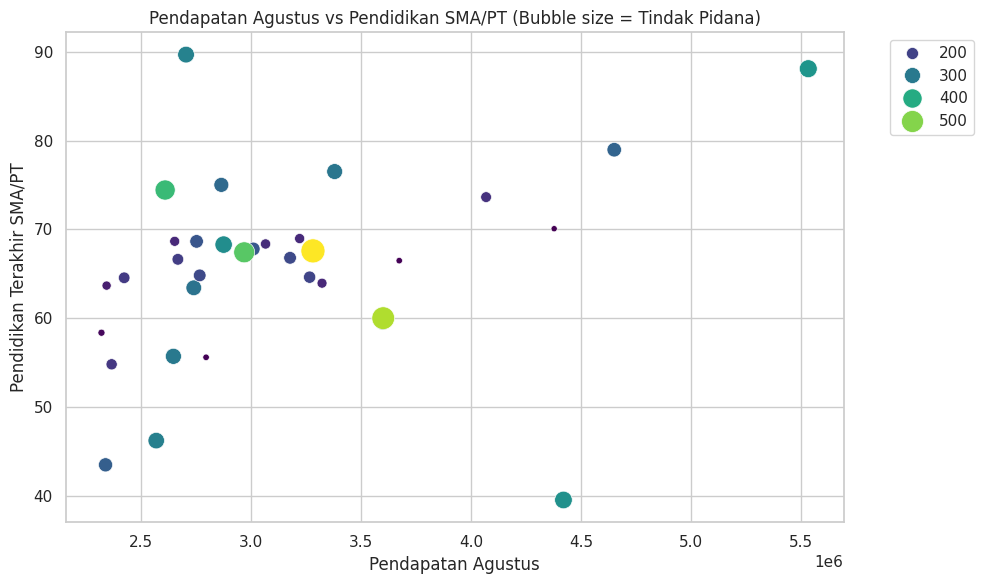

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_asli,
    x="Pendapatan Agustus",
    y="Pendidikan Terakhir SMA/PT",
    size="Tindak Pidana 2023",
    hue="Tindak Pidana 2023",
    palette="viridis",
    sizes=(20, 300),
    legend='brief'
)

plt.title("Pendapatan Agustus vs Pendidikan SMA/PT (Bubble size = Tindak Pidana)")
plt.xlabel("Pendapatan Agustus")
plt.ylabel("Pendidikan Terakhir SMA/PT")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


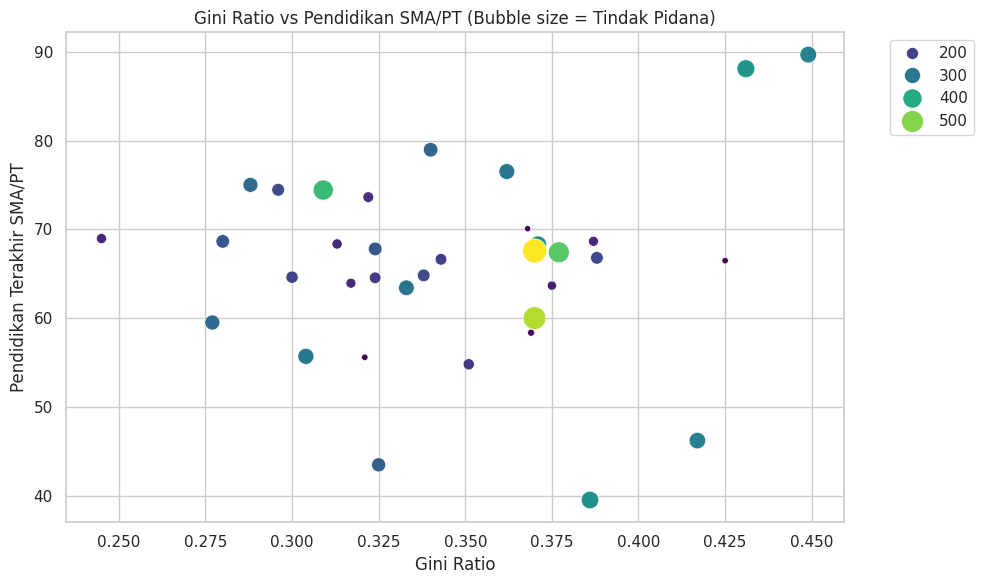

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_asli,
    x="gini_ratio_2023",
    y="Pendidikan Terakhir SMA/PT",
    size="Tindak Pidana 2023",
    hue="Tindak Pidana 2023",
    palette="viridis",
    sizes=(20, 300),
    legend='brief'
)

plt.title("Gini Ratio vs Pendidikan SMA/PT (Bubble size = Tindak Pidana)")
plt.xlabel("Gini Ratio")
plt.ylabel("Pendidikan Terakhir SMA/PT")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


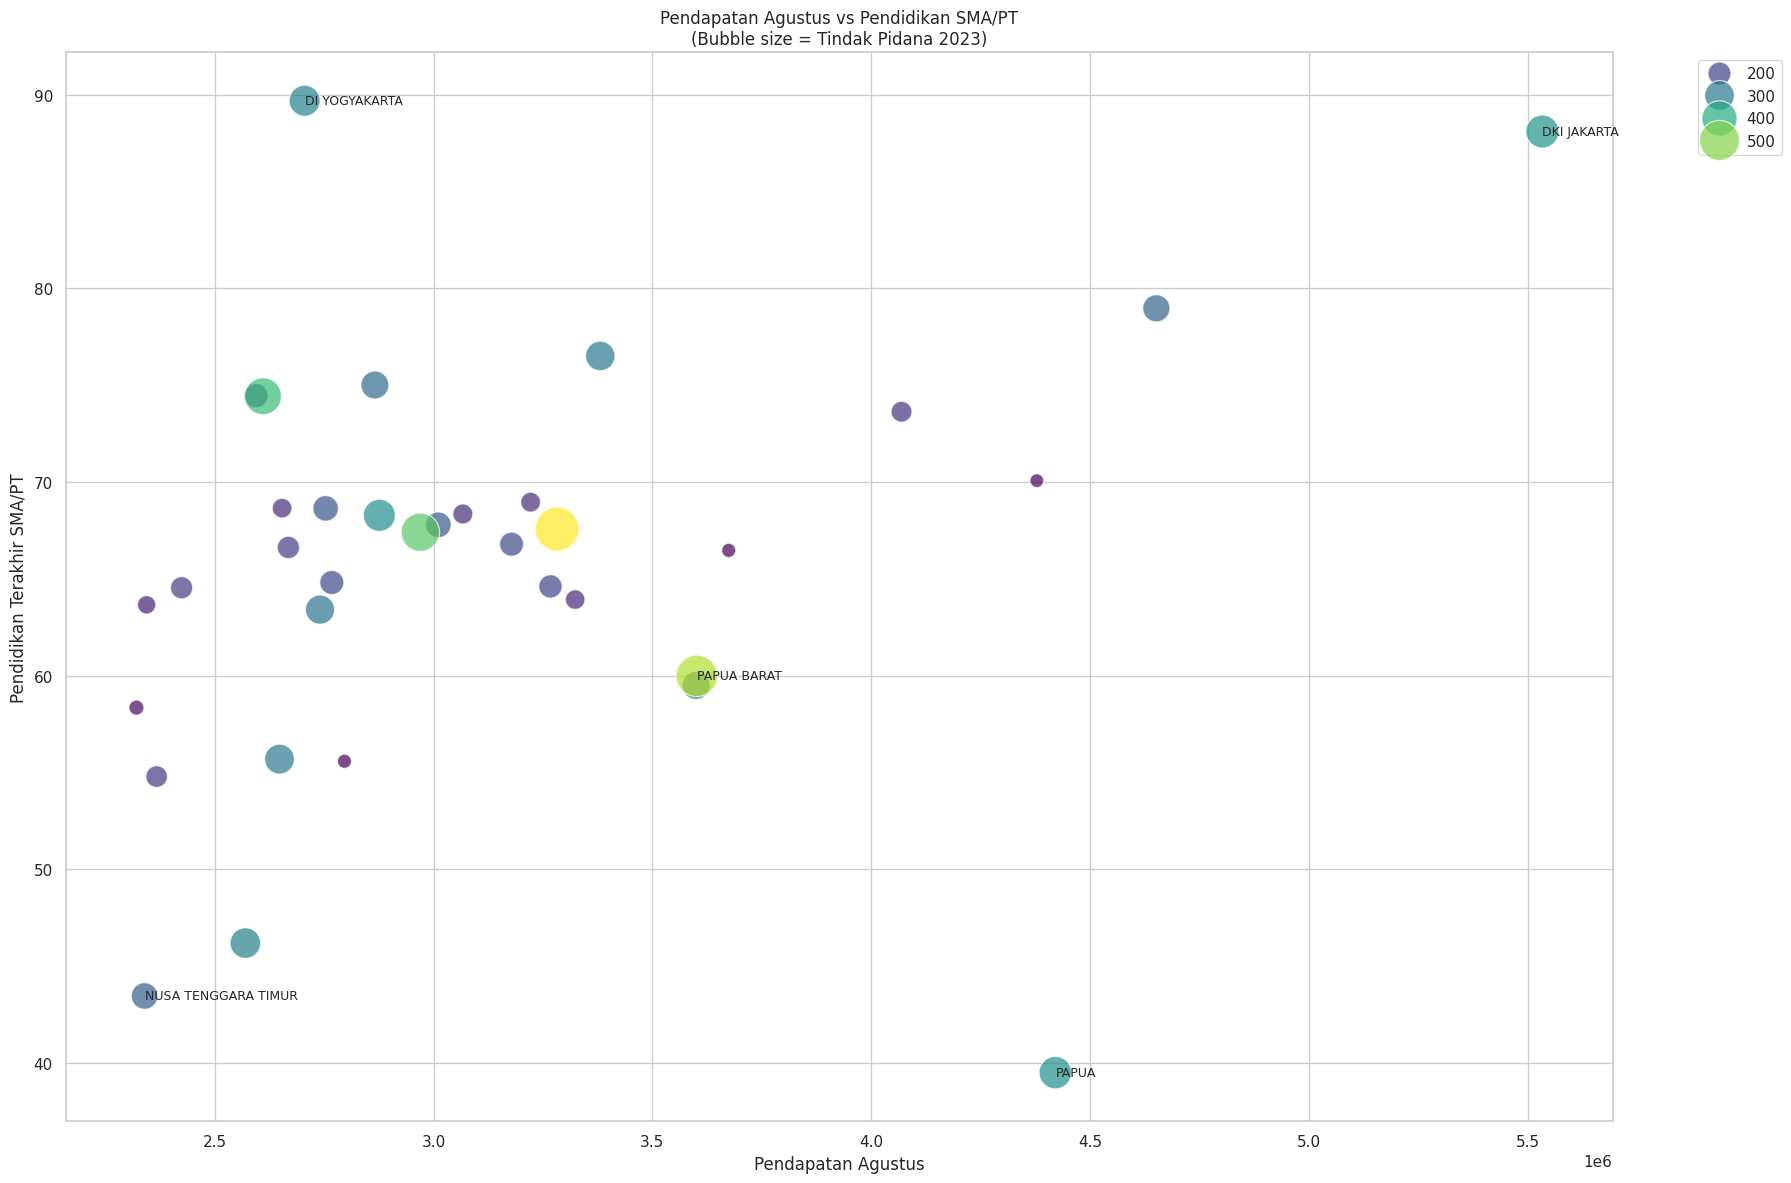

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12))

# Create the bubble plot
sns.scatterplot(
    data=df_asli,
    x="Pendapatan Agustus",
    y="Pendidikan Terakhir SMA/PT",
    size="Tindak Pidana 2023",
    hue="Tindak Pidana 2023",
    palette="viridis",
    sizes=(100, 1000),
    legend='brief',
    alpha=0.7
)

# Add labels for each province
for i, row in df_asli.iterrows():
    if row["Provinsi"] in ["DKI JAKARTA", "DI YOGYAKARTA", "NUSA TENGGARA TIMUR", "PAPUA BARAT", "PAPUA"]:
        plt.text(
            row["Pendapatan Agustus"] + 25,
            row["Pendidikan Terakhir SMA/PT"],
            row["Provinsi"],
            fontsize=9,
            ha='left',
            va='center'
        )

plt.title("Pendapatan Agustus vs Pendidikan SMA/PT\n(Bubble size = Tindak Pidana 2023)")
plt.xlabel("Pendapatan Agustus")
plt.ylabel("Pendidikan Terakhir SMA/PT")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [35]:
!pip install adjustText

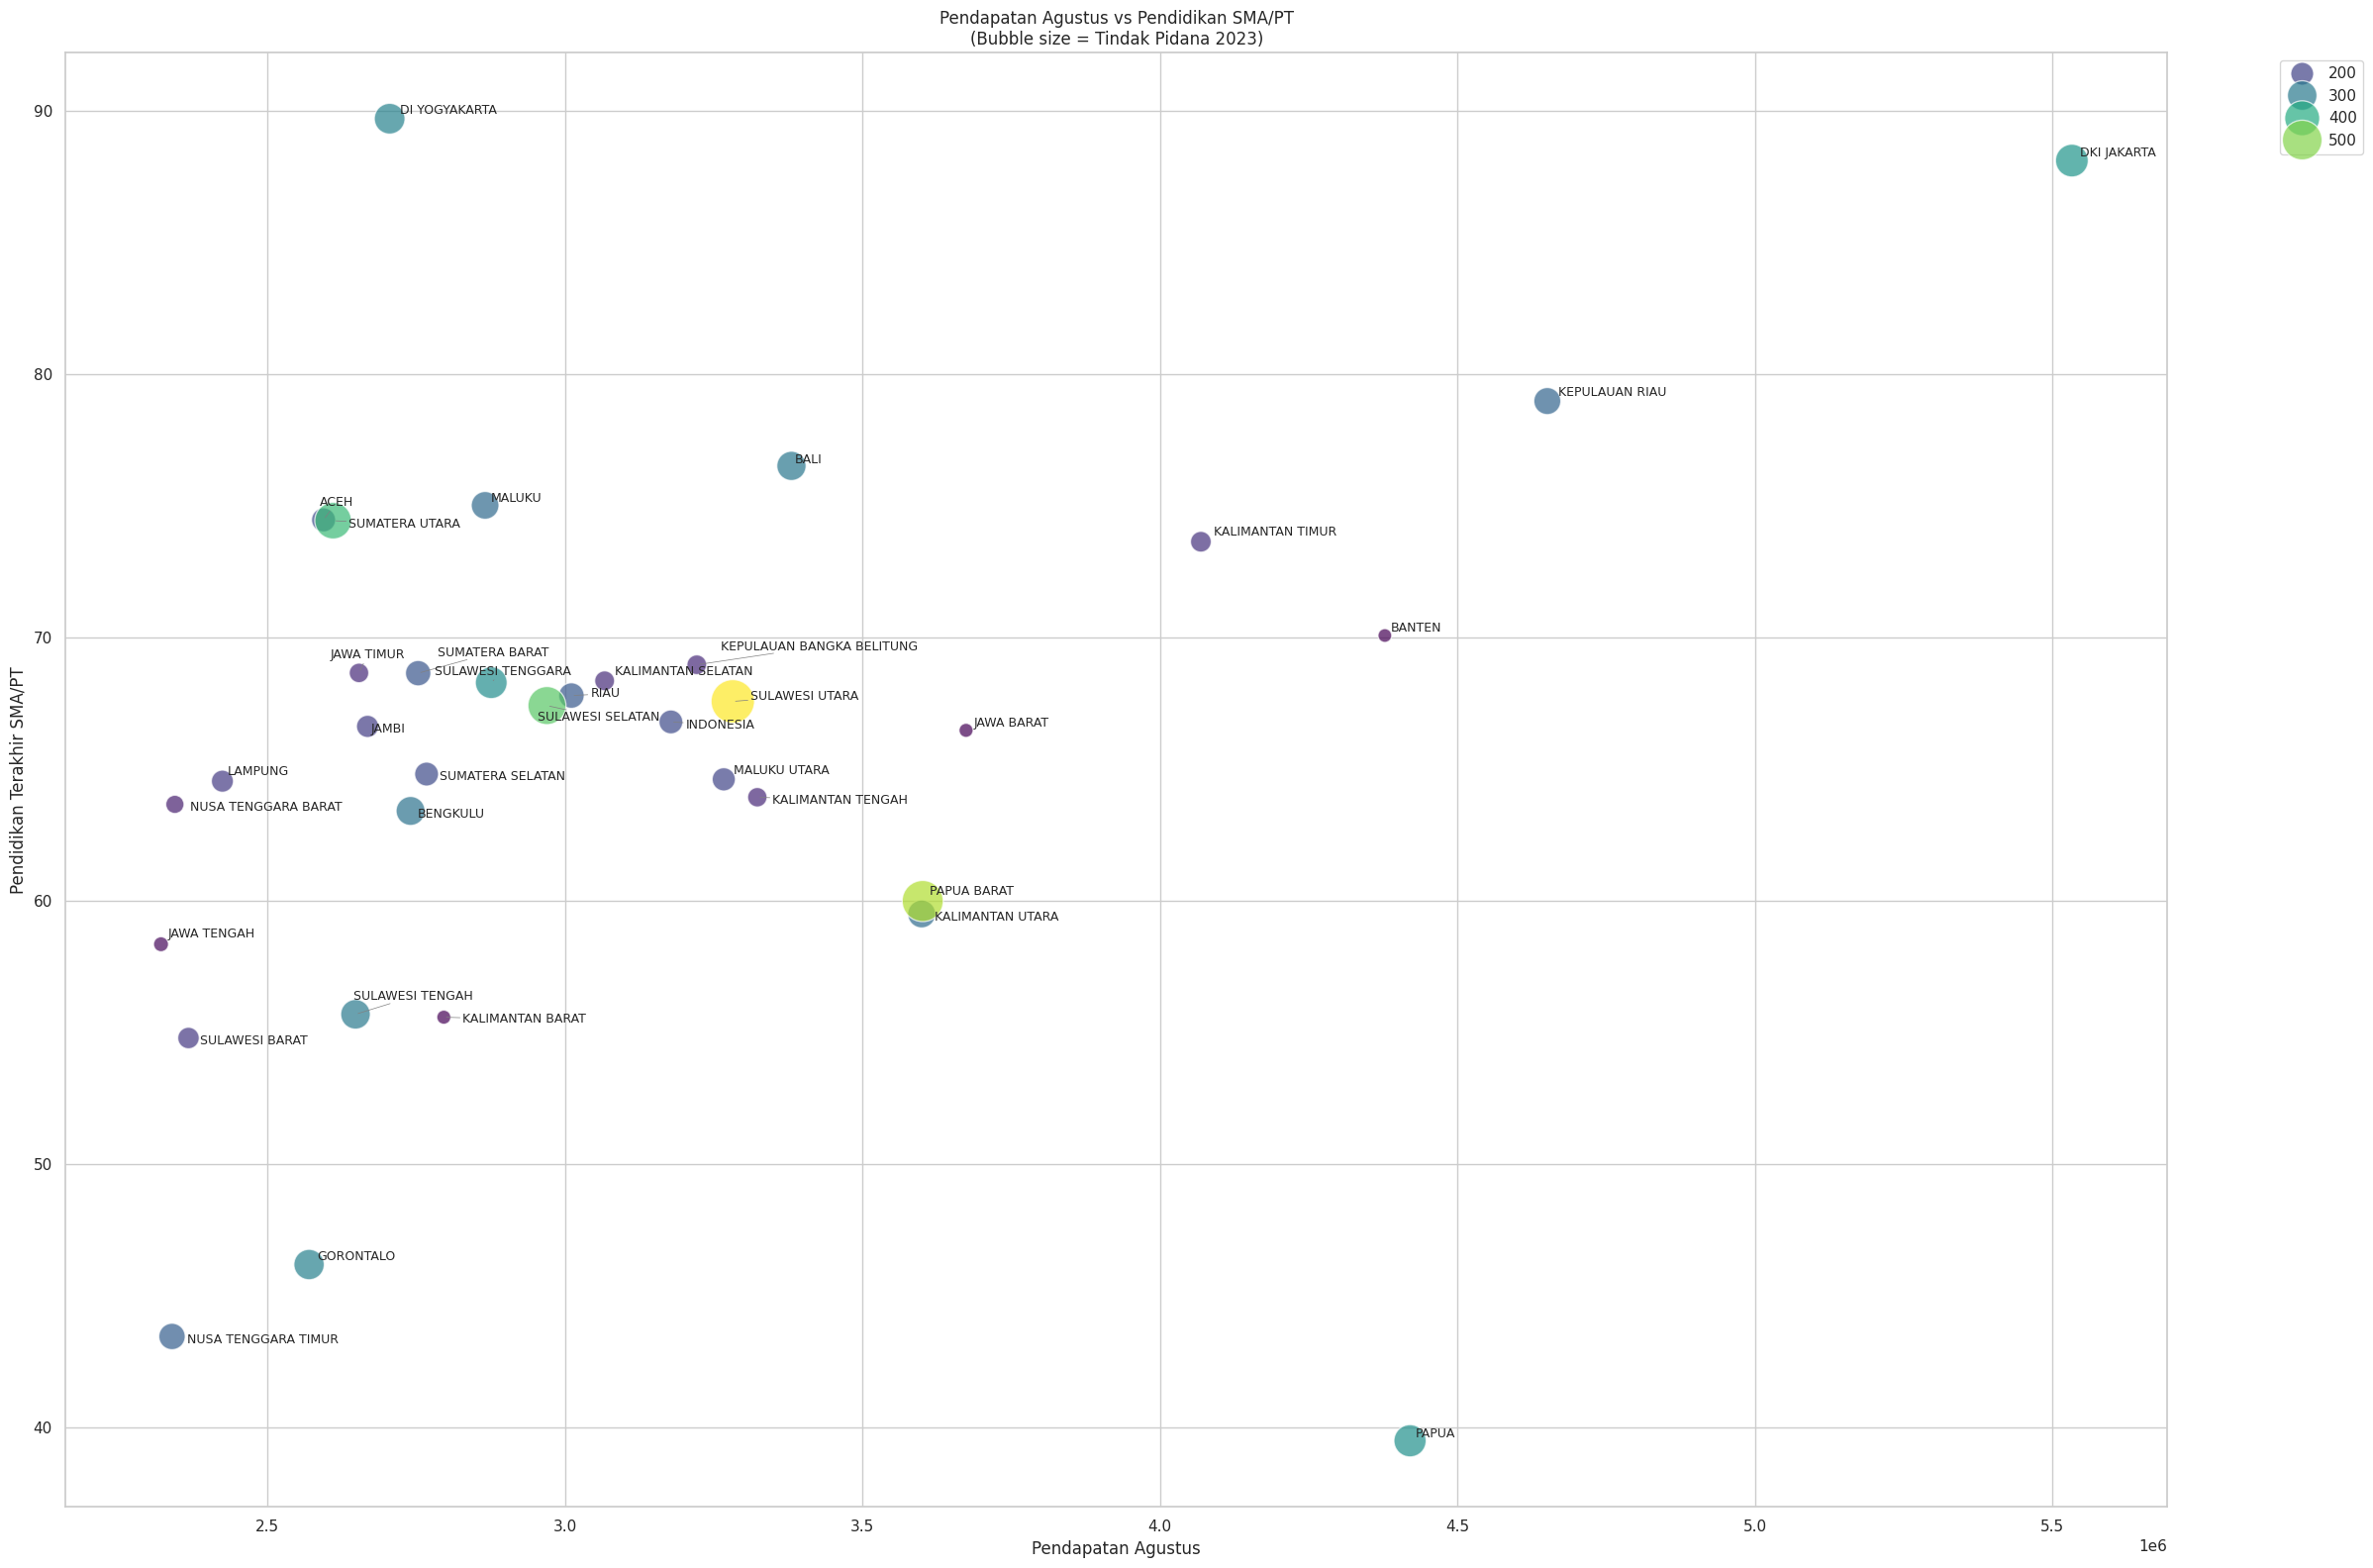

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text

plt.figure(figsize=(24, 16))

# Scatter plot
sns.scatterplot(
    data=df_asli,
    x="Pendapatan Agustus",
    y="Pendidikan Terakhir SMA/PT",
    size="Tindak Pidana 2023",
    hue="Tindak Pidana 2023",
    palette="viridis",
    sizes=(100, 1000),
    alpha=0.7,
    legend='brief'
)

# Create and adjust text labels
texts = []
for i, row in df_asli.iterrows():
    texts.append(
        plt.text(
            row["Pendapatan Agustus"],
            row["Pendidikan Terakhir SMA/PT"],
            row["Provinsi"],
            fontsize=9
        )
    )

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

plt.title("Pendapatan Agustus vs Pendidikan SMA/PT\n(Bubble size = Tindak Pidana 2023)")
plt.xlabel("Pendapatan Agustus")
plt.ylabel("Pendidikan Terakhir SMA/PT")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [37]:
# Define the region for each province
region_map = {
    "ACEH": "Sumatra",
    "SUMATERA UTARA": "Sumatra",
    "SUMATERA BARAT": "Sumatra",
    "RIAU": "Sumatra",
    "KEPULAUAN RIAU": "Sumatra",
    "JAMBI": "Sumatra",
    "SUMATERA SELATAN": "Sumatra",
    "BENGKULU": "Sumatra",
    "LAMPUNG": "Sumatra",
    "KEPULAUAN BANGKA BELITUNG": "Sumatra",

    "DKI JAKARTA": "Jawa",
    "JAWA BARAT": "Jawa",
    "JAWA TENGAH": "Jawa",
    "DI YOGYAKARTA": "Jawa",
    "JAWA TIMUR": "Jawa",
    "BANTEN": "Jawa",

    "KALIMANTAN BARAT": "Kalimantan",
    "KALIMANTAN TENGAH": "Kalimantan",
    "KALIMANTAN SELATAN": "Kalimantan",
    "KALIMANTAN TIMUR": "Kalimantan",
    "KALIMANTAN UTARA": "Kalimantan",

    "SULAWESI UTARA": "Sulawesi",
    "SULAWESI TENGAH": "Sulawesi",
    "SULAWESI SELATAN": "Sulawesi",
    "SULAWESI TENGGARA": "Sulawesi",
    "GORONTALO": "Sulawesi",
    "SULAWESI BARAT": "Sulawesi",

    "BALI": "Bali & Nusa Tenggara",
    "NUSA TENGGARA BARAT": "Bali & Nusa Tenggara",
    "NUSA TENGGARA TIMUR": "Bali & Nusa Tenggara",

    "MALUKU": "Maluku",
    "MALUKU UTARA": "Maluku",

    "PAPUA": "Papua",
    "PAPUA BARAT": "Papua",
}

# Assign the region to a new column
df_asli["Region"] = df_asli["Provinsi"].map(region_map)

<ipython-input-37-9eb1c74aa9d9>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asli["Region"] = df_asli["Provinsi"].map(region_map)


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set dark background color
plt.style.use('dark_background')  # optional
plt.rcParams['axes.facecolor'] = '#2B2B2B'
plt.rcParams['figure.facecolor'] = '#2B2B2B'
custom_palette = {
    "Sumatera": "#E81F63",
    "Jawa": "#C9FFF6",
    "Kalimantan": "#2A0F31",
    "Sulawesi": "#FFD447",
    "Bali & Nusa Tenggara": "#4CAF50",
    "Maluku": "#FF7F50",
    "Papua": "#007ACC",
    "Indonesia": "#FFFFFF"  # Optional if you have an aggregated row
}

# Create the plot
plt.figure(figsize=(12, 8))
plot = sns.scatterplot(
    data=df_asli,
    x="Pendapatan Agustus",
    y="Pendidikan Terakhir SMA/PT",
    size="Tindak Pidana 2023",
    hue="Region",
    palette=custom_palette,  # or map accordingly
    sizes=(50, 500),
    alpha=0.8,
    legend=False
)

# Fix legend to show only actual regions
handles, labels = plot.get_legend_handles_labels()
new_handles = []
new_labels = []

for h, l in zip(handles, labels):
    if l in df_asli["Region"].unique():
        new_handles.append(h)
        new_labels.append(l)

# plot.legend(
#     handles=new_handles,
#     labels=new_labels,
#     title="Region",
#     bbox_to_anchor=(1.05, 1),
#     loc='upper left'
# )

# Customize labels and title
plot.grid(False)
plt.ticklabel_format(style='plain', axis='x')
plt.tick_params(colors='white', labelsize=16)
plt.tick_params(colors='white')
plt.xlabel("")  # Remove x-axis label
plt.ylabel("")  # Remove y-axis label
plot.spines['top'].set_visible(False)
plot.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig("bubble_chart.png", dpi=300, transparent=True)
plt.show()


ValueError: The palette dictionary is missing keys: {'Sumatra'}

<Figure size 1200x800 with 0 Axes>

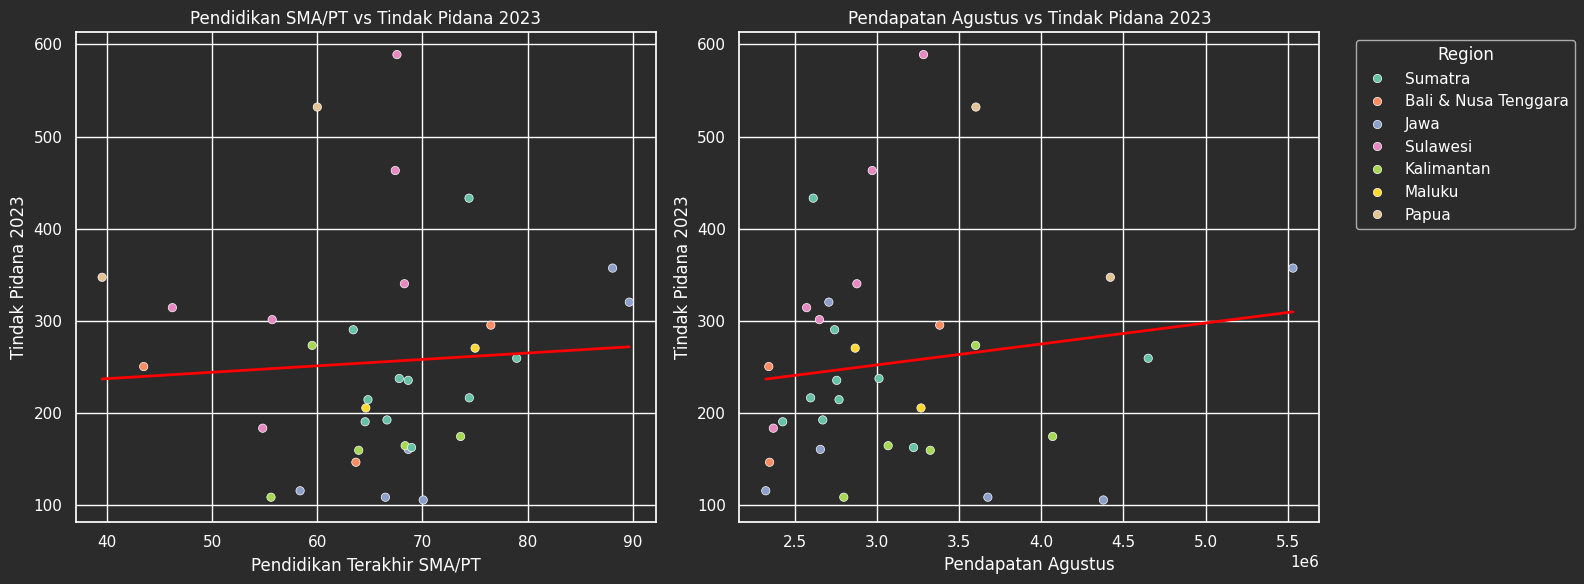

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First plot: Pendidikan SMA/PT vs Tindak Pidana
sns.scatterplot(
    data=df_asli,
    x="Pendidikan Terakhir SMA/PT",
    y="Tindak Pidana 2023",
    hue="Region",
    palette="Set2",
    ax=axes[0],
    legend=False
)
sns.regplot(
    data=df_asli,
    x="Pendidikan Terakhir SMA/PT",
    y="Tindak Pidana 2023",
    scatter=False,
    ax=axes[0],
    color="red",
    line_kws={"linewidth": 2},
    ci = None
)
axes[0].set_title("Pendidikan SMA/PT vs Tindak Pidana 2023")
axes[0].set_xlabel("Pendidikan Terakhir SMA/PT")
axes[0].set_ylabel("Tindak Pidana 2023")

# Second plot: Pendapatan Agustus vs Tindak Pidana
sns.scatterplot(
    data=df_asli,
    x="Pendapatan Agustus",
    y="Tindak Pidana 2023",
    hue="Region",
    palette="Set2",
    ax=axes[1]
)
sns.regplot(
    data=df_asli,
    x="Pendapatan Agustus",
    y="Tindak Pidana 2023",
    scatter=False,
    ax=axes[1],
    color="red",
    line_kws={"linewidth": 2},
    ci = None
)
axes[1].set_title("Pendapatan Agustus vs Tindak Pidana 2023")
axes[1].set_xlabel("Pendapatan Agustus")
axes[1].set_ylabel("Tindak Pidana 2023")

# Fix legend (only show once)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles, labels=labels, title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


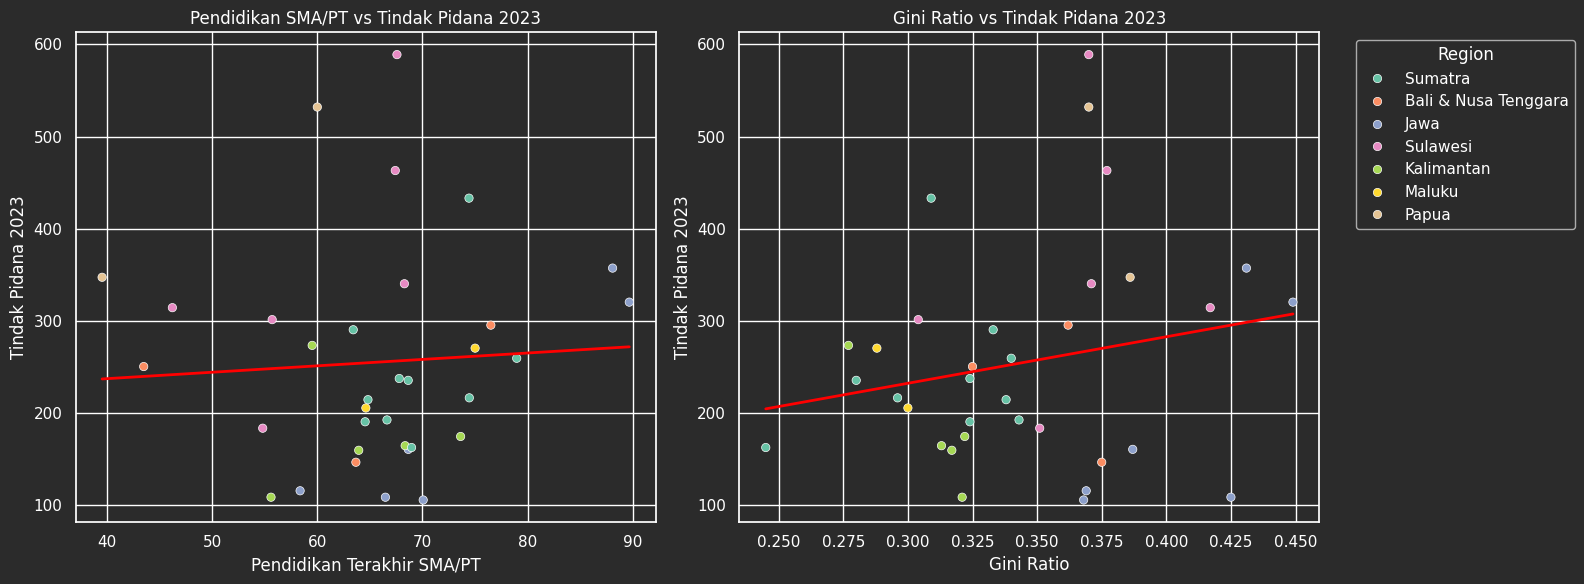

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First plot: Pendidikan SMA/PT vs Tindak Pidana
sns.scatterplot(
    data=df_asli,
    x="Pendidikan Terakhir SMA/PT",
    y="Tindak Pidana 2023",
    hue="Region",
    palette="Set2",
    ax=axes[0],
    legend=False
)
sns.regplot(
    data=df_asli,
    x="Pendidikan Terakhir SMA/PT",
    y="Tindak Pidana 2023",
    scatter=False,
    ax=axes[0],
    color="red",
    line_kws={"linewidth": 2},
    ci = None
)
axes[0].set_title("Pendidikan SMA/PT vs Tindak Pidana 2023")
axes[0].set_xlabel("Pendidikan Terakhir SMA/PT")
axes[0].set_ylabel("Tindak Pidana 2023")

# Second plot: Gini Ratio vs Tindak Pidana
sns.scatterplot(
    data=df_asli,
    x="gini_ratio_2023",
    y="Tindak Pidana 2023",
    hue="Region",
    palette="Set2",
    ax=axes[1]
)
sns.regplot(
    data=df_asli,
    x="gini_ratio_2023",
    y="Tindak Pidana 2023",
    scatter=False,
    ax=axes[1],
    color="red",
    line_kws={"linewidth": 2},
    ci = None
)
axes[1].set_title("Gini Ratio vs Tindak Pidana 2023")
axes[1].set_xlabel("Gini Ratio")
axes[1].set_ylabel("Tindak Pidana 2023")

# Fix legend (only show once)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles, labels=labels, title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [41]:
region_map = {
    "ACEH": "Sumatra",
    "SUMATERA UTARA": "Sumatra",
    "SUMATERA BARAT": "Sumatra",
    "RIAU": "Sumatra",
    "KEPULAUAN RIAU": "Sumatra",
    "JAMBI": "Sumatra",
    "SUMATERA SELATAN": "Sumatra",
    "BENGKULU": "Sumatra",
    "LAMPUNG": "Sumatra",
    "KEPULAUAN BANGKA BELITUNG": "Sumatra",

    "DKI JAKARTA": "Jawa",
    "JAWA BARAT": "Jawa",
    "JAWA TENGAH": "Jawa",
    "DI YOGYAKARTA": "Jawa",
    "JAWA TIMUR": "Jawa",
    "BANTEN": "Jawa",

    "KALIMANTAN BARAT": "Kalimantan",
    "KALIMANTAN TENGAH": "Kalimantan",
    "KALIMANTAN SELATAN": "Kalimantan",
    "KALIMANTAN TIMUR": "Kalimantan",
    "KALIMANTAN UTARA": "Kalimantan",

    "SULAWESI UTARA": "Sulawesi",
    "SULAWESI TENGAH": "Sulawesi",
    "SULAWESI SELATAN": "Sulawesi",
    "SULAWESI TENGGARA": "Sulawesi",
    "GORONTALO": "Sulawesi",
    "SULAWESI BARAT": "Sulawesi",

    "BALI": "Bali & Nusa Tenggara",
    "NUSA TENGGARA BARAT": "Bali & Nusa Tenggara",
    "NUSA TENGGARA TIMUR": "Bali & Nusa Tenggara",

    "MALUKU": "Maluku",
    "MALUKU UTARA": "Maluku",

    "PAPUA": "Papua",
    "PAPUA BARAT": "Papua",
}

# Assign the region to a new column
df_asli["Region"] = df_asli["Provinsi"].map(region_map)

<ipython-input-41-844b08bee6e7>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asli["Region"] = df_asli["Provinsi"].map(region_map)


In [42]:
numeric_cols = df_asli.select_dtypes(include="number").columns.drop("Jumlah Penduduk")

def weighted_means(group):
    # build a dict { col: weighted_avg }
    wm = {
        col: np.average(group[col], weights=group["Jumlah Penduduk"])
        for col in numeric_cols
    }
    return pd.Series(wm)

df_region = (
    df_asli
    .groupby("Region")
    .apply(weighted_means)
    .reset_index()
)

<ipython-input-42-6bd13f00f6e4>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(weighted_means)


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# First plot: Pendidikan SMA/PT
# ===============================
fig1, ax1 = plt.subplots(figsize=(8, 6))

sns.scatterplot(
    data=df_region,
    x="Pendidikan Terakhir SMA/PT",
    y="Tindak Pidana 2023",
    hue="Region",
    palette="Set2",
    ax=ax1,
    legend=False,
    s=120
)

ax1.set_title("")
ax1.set_xlabel("")
ax1.set_ylabel("")

# Style adjustments
ax1.grid(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='both', colors='#d9d9d9', labelsize=16)
ax1.xaxis.label.set_color('#d9d9d9')
ax1.yaxis.label.set_color('#d9d9d9')
ax1.title.set_color('#d9d9d9')

plt.tight_layout()
fig1.savefig(
    "plot_pendidikan_vs_pidana.png",
    dpi=300,
    transparent=True,
    facecolor='none',
    bbox_inches='tight',
    pad_inches=0.1
)
plt.close(fig1)

# ===============================
# Second plot: Pendapatan Agustus
# ===============================
fig2, ax2 = plt.subplots(figsize=(8, 6))

scatter_plot = sns.scatterplot(
    data=df_region,
    x="Pendapatan Agustus",
    y="Tindak Pidana 2023",
    hue="Region",
    palette="Set2",
    legend=False,
    ax=ax2,
    s=120
)

ax2.set_title("")
ax2.set_xlabel("")
ax2.set_ylabel("")

# Style adjustments
ax2.grid(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(axis='both', colors='#d9d9d9', labelsize=16)
ax2.xaxis.label.set_color('#d9d9d9')
ax2.yaxis.label.set_color('#d9d9d9')
ax2.title.set_color('#d9d9d9')

plt.tight_layout()
fig2.savefig(
    "plot_pendapatan_vs_pidana.png",
    dpi=300,
    transparent=True,
    facecolor='none',
    bbox_inches='tight',
    pad_inches=0.1,
)
plt.close(fig2)

# ===============================
# Separate legend from ax2
# ===============================
handles, labels = ax2.get_legend_handles_labels()

fig_legend = plt.figure(figsize=(4, 4))
fig_legend.patch.set_alpha(0.0)

ax_legend = fig_legend.add_subplot(111)
ax_legend.patch.set_alpha(0.0)
ax_legend.axis('off')

legend = ax_legend.legend(
    handles,
    labels,
    title="Region",
    loc="center",
    frameon=False
)
legend.get_frame().set_facecolor('none')
legend.get_frame().set_edgecolor('none')

fig_legend.canvas.draw()
bbox = legend.get_window_extent().transformed(fig_legend.dpi_scale_trans.inverted())

fig_legend.savefig(
    "legend_only.png",
    bbox_inches=bbox,
    dpi=300,
    transparent=True,
    facecolor='none',
    edgecolor='none',
    pad_inches=0.1
)

plt.close(fig_legend)


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- First plot ---
fig, ax1 = plt.subplots(figsize=(8, 6))
sns.scatterplot(
    data=df_region,
    x="Pendidikan Terakhir SMA/PT",
    y="Tindak Pidana 2023",
    hue="Region",
    palette="Set2",
    ax=ax1,
    legend=False,
    s=100  # Point size
)

# Clean up
ax1.set_title("")
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.grid(False)
ax1.set_facecolor('none')
fig.patch.set_alpha(0)

# Remove top and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Save
plt.tight_layout()
plt.savefig("plot_pendidikan_vs_pidana.png", dpi=300, bbox_inches='tight', transparent=True)
plt.close()

# --- Second plot ---
fig, ax2 = plt.subplots(figsize=(8, 6))
sns.scatterplot(
    data=df_region,
    x="Pendapatan Agustus",
    y="Tindak Pidana 2023",
    hue="Region",
    palette="Set2",
    ax=ax2,
    legend=False,
    s=100
)

# Clean up
ax2.set_title("")
ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.grid(False)
ax2.set_facecolor('none')
fig.patch.set_alpha(0)

# Remove top and right spines
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Save
plt.tight_layout()
plt.savefig("plot_pendapatan_vs_pidana.png", dpi=300, bbox_inches='tight', transparent=True)
plt.close()


In [59]:
df_asli

,Provinsi,Pendapatan Februari,Pendapatan Agustus,SD_2023,SMP_2023,SMA_2023,Tidak Tamat SD,Pendidikan Terakhir SD,Pendidikan Terakhir SMP,Pendidikan Terakhir SMA/PT,Tindak Pidana 2021,Tindak Pidana 2022,Tindak Pidana 2023,gini_ratio_2023,Jumlah Penduduk,Region
0,ACEH,2294901,2594529.697,99.08,94.55,74.46,0.92,4.53,20.09,74.46,125,190,216,0.296,5482.5,Sumatra
1,BALI,3200254,3380839.733,98.43,93.03,76.51,1.57,5.40,16.52,76.51,55,144,295,0.362,4404.3,Bali & Nusa Tenggara
2,BANTEN,3732183,4378057.554,97.15,90.86,70.07,2.85,6.29,20.79,70.07,27,42,105,0.368,12307.7,Jawa
3,BENGKULU,2363579,2740734.246,97.10,89.25,63.41,2.90,7.85,25.84,63.41,177,179,290,0.333,2086.0,Sumatra
4,DI YOGYAKARTA,2374873,2705600.832,98.95,97.02,89.69,1.05,1.93,7.33,89.69,123,285,320,0.449,3736.5,Jawa
5,DKI JAKARTA,5071094,5532624.092,98.66,95.85,88.10,1.34,2.81,7.75,88.10,277,307,357,0.431,10672.1,Jawa
6,GORONTALO,2590343,2570180.707,93.69,83.71,46.19,6.31,9.98,37.52,46.19,208,211,314,0.417,1213.2,Sulawesi
7,INDONESIA,2944541,3178227.238,97.83,90.44,66.79,2.17,7.39,23.65,66.79,90,137,214,0.388,278696.2,NaN
8,JAMBI,2524049,2668478.458,97.76,89.35,66.62,2.24,8.41,22.73,66.62,104,149,192,0.343,3679.2,Sumatra
9,JAWA BARAT,3333558,3674236.007,99.09,91.42,66.47,0.91,7.67,24.95,66.47,15,60,108,0.425,49860.3,Jawa


In [57]:
df_region

,Region,Pendapatan Februari,Pendapatan Agustus,SD_2023,SMP_2023,SMA_2023,Tidak Tamat SD,Pendidikan Terakhir SD,Pendidikan Terakhir SMP,Pendidikan Terakhir SMA/PT,Tindak Pidana 2021,Tindak Pidana 2022,Tindak Pidana 2023,gini_ratio_2023
0,Bali & Nusa Tenggara,2.462892e+06,2.636726e+06,96.515699,89.219007,60.061336,3.484301,7.296692,29.157670,60.061336,91.530807,115.703194,225.532056,0.353388
1,Jawa,2.964559e+06,3.235558e+06,98.659437,91.444341,67.418339,1.340563,7.215096,24.026002,67.418339,47.963987,104.096706,145.487789,0.397835
2,Kalimantan,3.153781e+06,3.269580e+06,96.458720,87.651187,64.300717,3.541280,8.807533,23.350470,64.300717,104.022498,105.311130,151.826276,0.316765
3,Maluku,3.009726e+06,3.030621e+06,98.529922,93.719400,70.741262,1.470078,4.810523,22.978137,70.741262,138.006723,114.044511,243.320389,0.292925
4,Papua,3.975967e+06,4.248891e+06,82.728444,71.624202,43.790613,17.271556,11.104243,27.833588,43.790613,207.568236,211.482663,385.739065,0.382650
5,Sulawesi,2.750138e+06,2.882911e+06,97.381670,88.843832,63.628888,2.618330,8.537839,25.214943,63.628888,165.691974,272.672682,409.738615,0.364820
6,Sumatra,2.540484e+06,2.756026e+06,98.034193,91.036652,69.430921,1.965807,6.997541,21.605731,69.430921,155.022700,187.198531,272.045310,0.315581


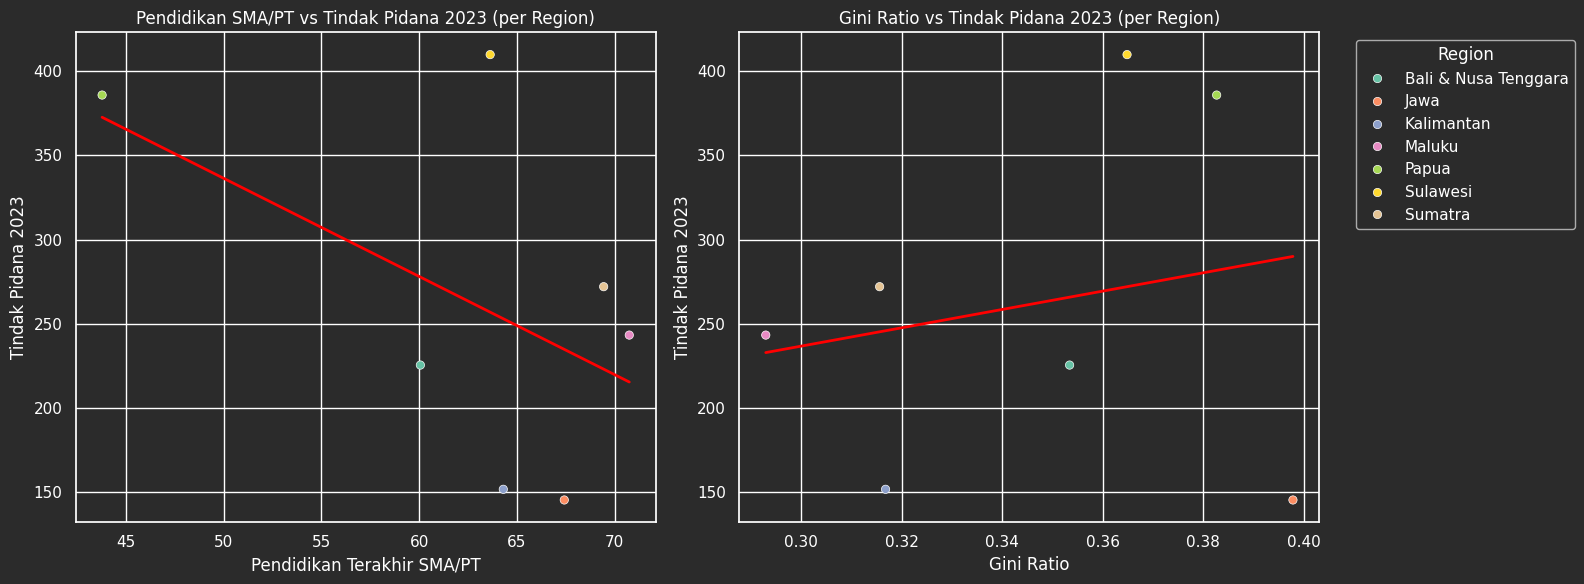

In [45]:
# Set the figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First plot: Pendidikan SMA/PT vs Tindak Pidana
sns.scatterplot(
    data=df_region,
    x="Pendidikan Terakhir SMA/PT",
    y="Tindak Pidana 2023",
    hue="Region",
    palette="Set2",
    ax=axes[0],
    legend=False
)
sns.regplot(
    data=df_region,
    x="Pendidikan Terakhir SMA/PT",
    y="Tindak Pidana 2023",
    scatter=False,
    ax=axes[0],
    color="red",
    line_kws={"linewidth": 2},
    ci=None
)
axes[0].set_title("Pendidikan SMA/PT vs Tindak Pidana 2023 (per Region)")
axes[0].set_xlabel("Pendidikan Terakhir SMA/PT")
axes[0].set_ylabel("Tindak Pidana 2023")

# Second plot: Gini Ratio vs Tindak Pidana
sns.scatterplot(
    data=df_region,
    x="gini_ratio_2023",
    y="Tindak Pidana 2023",
    hue="Region",
    palette="Set2",
    ax=axes[1]
)
sns.regplot(
    data=df_region,
    x="gini_ratio_2023",
    y="Tindak Pidana 2023",
    scatter=False,
    ax=axes[1],
    color="red",
    line_kws={"linewidth": 2},
    ci=None
)
axes[1].set_title("Gini Ratio vs Tindak Pidana 2023 (per Region)")
axes[1].set_xlabel("Gini Ratio")
axes[1].set_ylabel("Tindak Pidana 2023")

# Fix legend (only show once)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles, labels=labels, title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [46]:
# Reshape the data for line plotting
df_melted = df_asli.melt(
    id_vars=["Provinsi", "Region"],
    value_vars=["Tindak Pidana 2021", "Tindak Pidana 2022", "Tindak Pidana 2023"],
    var_name="Tahun",
    value_name="Jumlah Tindak Pidana"
)

# Convert "Tahun" from string like "Tindak Pidana 2021" to int
df_melted["Tahun"] = df_melted["Tahun"].str.extract(r"(\d{4})").astype(int)


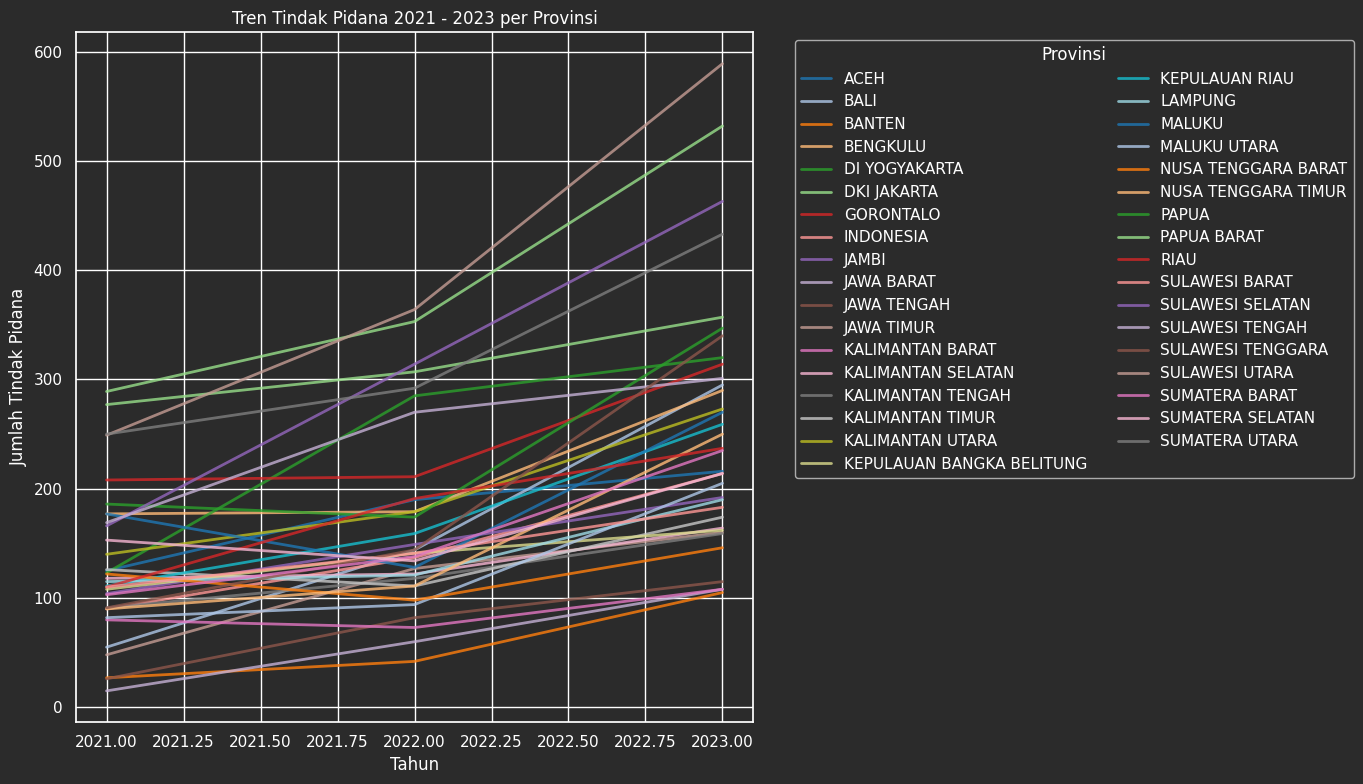

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

sns.lineplot(
    data=df_melted,
    x="Tahun",
    y="Jumlah Tindak Pidana",
    hue="Provinsi",
    palette="tab20",  # Can change if you have many provinces
    alpha=0.8,
    linewidth=2
)

plt.title("Tren Tindak Pidana 2021 - 2023 per Provinsi")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Tindak Pidana")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Provinsi", ncol=2)
plt.tight_layout()
plt.show()


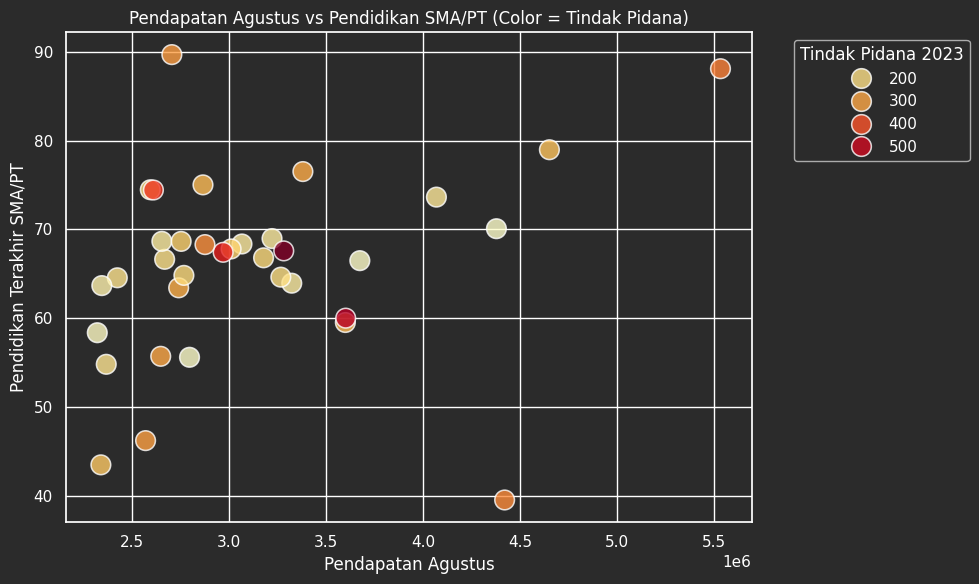

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df_asli,
    x="Pendapatan Agustus",
    y="Pendidikan Terakhir SMA/PT",
    hue="Tindak Pidana 2023",
    palette="YlOrRd",
    s=200,  # fixed bubble size
    alpha=0.8
)

plt.title("Pendapatan Agustus vs Pendidikan SMA/PT (Color = Tindak Pidana)")
plt.xlabel("Pendapatan Agustus")
plt.ylabel("Pendidikan Terakhir SMA/PT")
plt.legend(title="Tindak Pidana 2023", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


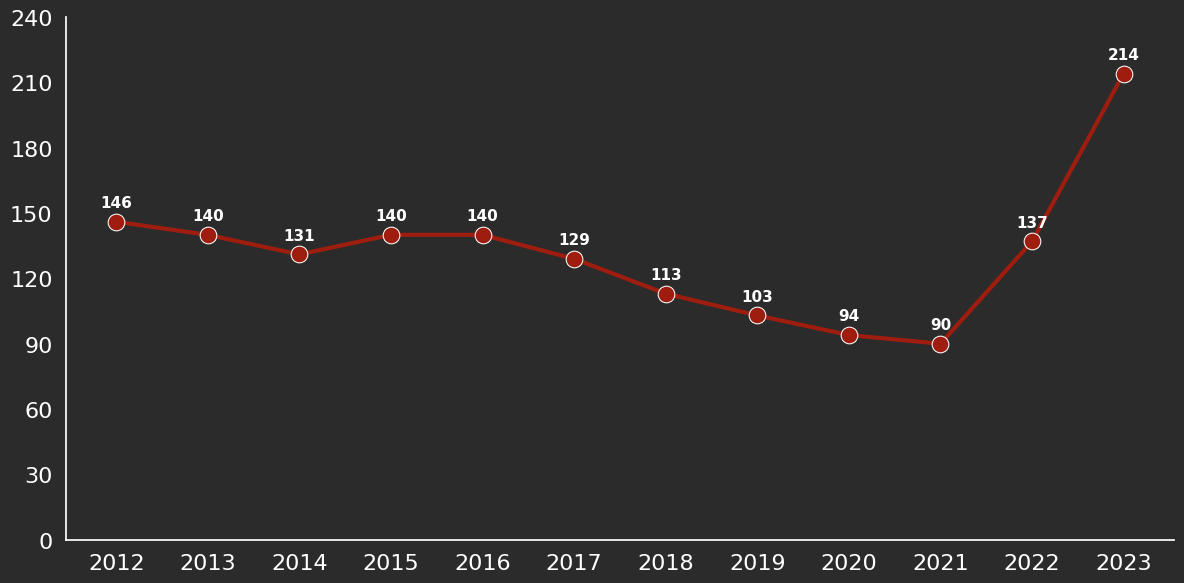

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for Indonesia
indonesia_data = df_tindak_pidana_time_series[df_tindak_pidana_time_series['Provinsi'] == 'INDONESIA']

# Check if we have data
if indonesia_data.empty:
    print("No data found for Indonesia")
else:
    indonesia_data = indonesia_data.reset_index(drop=True)

    # Melt into long format
    years = [str(year) for year in range(2012, 2024)]
    indonesia_melted = pd.melt(
        indonesia_data,
        id_vars=['Provinsi'],
        value_vars=years,
        var_name='Year',
        value_name='Crime_Count'
    )

    # Convert data types
    indonesia_melted['Year'] = pd.to_numeric(indonesia_melted['Year'])
    indonesia_melted['Crime_Count'] = pd.to_numeric(indonesia_melted['Crime_Count'], errors='coerce')

    # Set max Y for label offset
    y_max = indonesia_melted['Crime_Count'].max()

    # Setup figure and styling
    plt.figure(figsize=(12, 6))
    sns.set_style("darkgrid")

    # Custom dark background and white text
    plt.rcParams['figure.facecolor'] = '#2B2B2B'
    plt.rcParams['axes.facecolor'] = '#2B2B2B'
    plt.rcParams['text.color'] = 'white'
    plt.rcParams['axes.labelcolor'] = 'white'
    plt.rcParams['xtick.color'] = 'white'
    plt.rcParams['ytick.color'] = 'white'

    # Plot line with markers
    sns.lineplot(
        data=indonesia_melted,
        x='Year',
        y='Crime_Count',
        color='#9E1D0F',
        linewidth=3,
        marker='o',
        markersize=12
    )

    # Customize axes
    plt.xlabel('', fontsize=16)
    plt.ylabel('', fontsize=16)
    plt.xticks(indonesia_melted['Year'], fontsize=16)
    plt.ylim(0, y_max + 20)
    plt.yticks(range(0, int(y_max + 30), 30), fontsize=16)

    # Hide borders
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')

    # Add point labels
    for x, y in zip(indonesia_melted['Year'], indonesia_melted['Crime_Count']):
        plt.text(x, y + y_max * 0.025, f'{int(y):,}', ha='center', va='bottom', color='white', fontweight='bold', fontsize=11)

    # Final render
    plt.grid(False)
    plt.tight_layout()
    plt.savefig('tindak_pidana_indonesia.png', dpi=600, bbox_inches='tight', transparent=True)
    plt.show()


### Geomap

In [50]:
# Import necessary libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import folium
from folium.plugins import HeatMap
from branca.colormap import linear

# Download the GeoJSON file from Google Drive
!pip install gdown
import gdown

In [51]:
# Download the GeoJSON file from Google Drive
url = 'https://drive.google.com/file/d/1kg6e-bxqff1btvK4f_LfZKuRS0tckx2O/view?usp=drive_link'
output = 'indonesia_provinces.geojson'
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1kg6e-bxqff1btvK4f_LfZKuRS0tckx2O
To: /content/indonesia_provinces.geojson
100%|██████████| 728k/728k [00:00<00:00, 78.5MB/s]


'indonesia_provinces.geojson'

In [52]:
# Load GeoJSON data
gdf = gpd.read_file('indonesia_provinces.geojson')

# Load CSV data
df = df_asli

In [53]:
# Let's examine our data
print("GeoJSON data:")
print(gdf.head())
print("\nCSV data:")
print(df.head())

GeoJSON data:
   ID  kode             Propinsi                                     SUMBER  \
0   2    52  NUSA TENGGARA BARAT  Peta Dasar BAKOSURTANAL Skala 1 : 250.000   
1   3    75            GORONTALO  Peta Dasar BAKOSURTANAL Skala 1 : 250.000   
2   4    74    SULAWESI TENGGARA  Peta Dasar BAKOSURTANAL Skala 1 : 250.000   
3   5    34        DI YOGYAKARTA  Peta Dasar BAKOSURTANAL Skala 1 : 250.000   
4   6    33          JAWA TENGAH  Peta Dasar BAKOSURTANAL Skala 1 : 250.000   

                                            geometry  
0  MULTIPOLYGON (((117.6272 -8.5064, 117.6347 -8....  
1  POLYGON ((122.18814 1.0453, 122.22627 1.00335,...  
2  MULTIPOLYGON (((120.98423 -2.83534, 121.07834 ...  
3  POLYGON ((110.01183 -7.8869, 110.04295 -7.8920...  
4  MULTIPOLYGON (((108.82934 -6.74608, 108.85489 ...  

CSV data:
        Provinsi  Pendapatan Februari  Pendapatan Agustus  SD_2023  SMP_2023  \
0           ACEH              2294901         2594529.697    99.08     94.55   
1         

In [54]:
# Make sure province names match between the two datasets
# You might need to adjust this based on how the names are formatted in your GeoJSON
gdf['Provinsi'] = gdf['Propinsi'].str.upper()
df['Provinsi'] = df['Provinsi'].str.upper()

<ipython-input-54-e875c3a545a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Provinsi'] = df['Provinsi'].str.upper()


Static map has been created and saved with a transparent background!


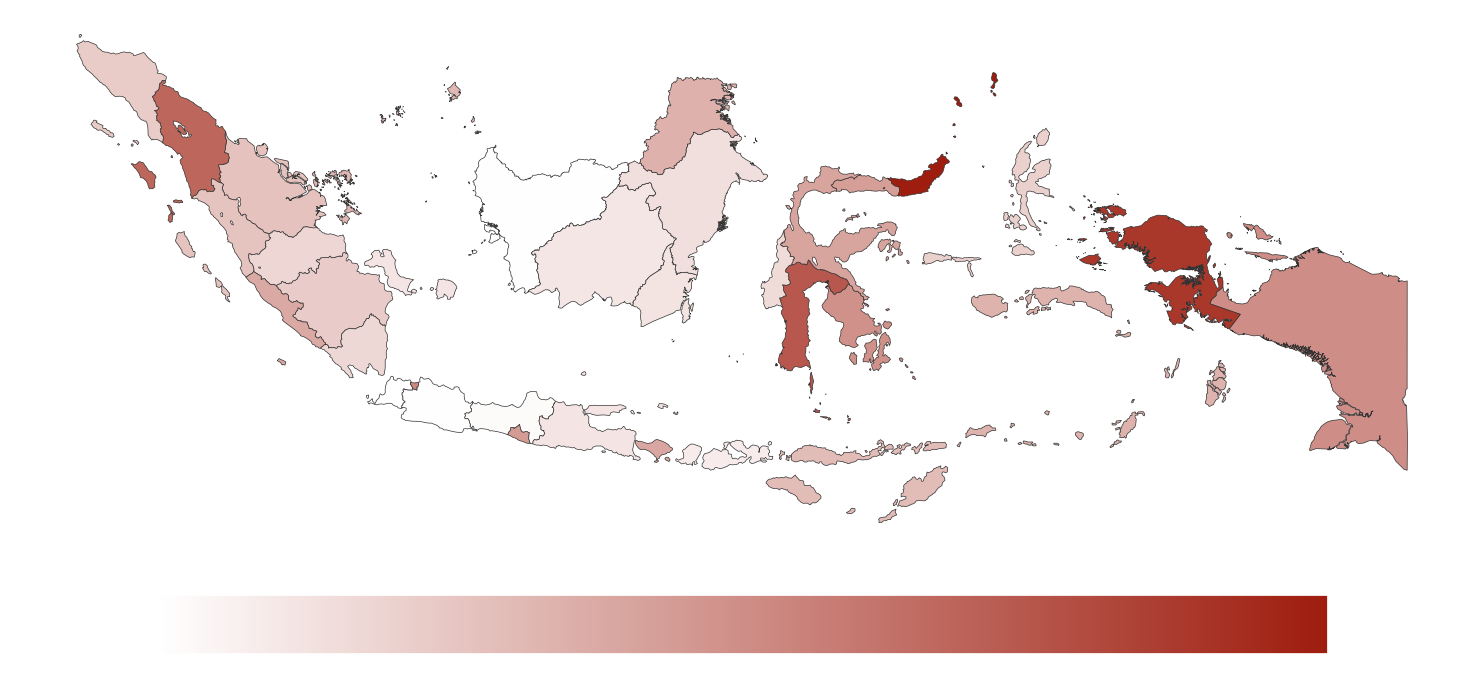

In [55]:
# Merge GeoDataFrame and DataFrame on 'Provinsi'
merged_df = gdf.merge(df, on='Provinsi', how='left')

# Create a custom colormap from white to dark red
colors = ['white', '#9E1D0F']
custom_cmap = LinearSegmentedColormap.from_list('custom_red', colors)

# Create a figure with transparent background
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
fig.patch.set_alpha(0.0)  # Make figure background transparent

# Plot the choropleth map for Tindak Pidana 2023
crime_map = merged_df.plot(
    column='Tindak Pidana 2023',
    ax=ax,
    legend=True,
    cmap=custom_cmap,
    missing_kwds={'color': '#555555'},  # Dark grey for missing data
    legend_kwds={
        'orientation': "horizontal",
        'shrink': 0.8,
        'pad': 0.05,
        'format': '%.0f'
    },
    edgecolor='#333333',
    linewidth=0.5
)

# Remove axis and grid
ax.set_axis_off()
ax.grid(False)
ax.patch.set_alpha(0.0)  # Make axis background transparent

# Adjust colorbar tick label color to white
cbar = ax.get_figure().get_axes()[1]
cbar.tick_params(labelcolor='white')
cbar.patch.set_alpha(0.0)  # Make colorbar background transparent

# Tight layout
plt.tight_layout()

# Save the figure with transparent background
plt.savefig(
    'tindak_pidana_2023_static_map.png',
    dpi=300,
    bbox_inches='tight',
    transparent=True,
    facecolor='none',  # Additional parameter to ensure transparency
    edgecolor='none'   # Additional parameter to ensure transparency
)

print("Static map has been created and saved with a transparent background!")

In [56]:
df

,Provinsi,Pendapatan Februari,Pendapatan Agustus,SD_2023,SMP_2023,SMA_2023,Tidak Tamat SD,Pendidikan Terakhir SD,Pendidikan Terakhir SMP,Pendidikan Terakhir SMA/PT,Tindak Pidana 2021,Tindak Pidana 2022,Tindak Pidana 2023,gini_ratio_2023,Jumlah Penduduk,Region
0,ACEH,2294901,2594529.697,99.08,94.55,74.46,0.92,4.53,20.09,74.46,125,190,216,0.296,5482.5,Sumatra
1,BALI,3200254,3380839.733,98.43,93.03,76.51,1.57,5.40,16.52,76.51,55,144,295,0.362,4404.3,Bali & Nusa Tenggara
2,BANTEN,3732183,4378057.554,97.15,90.86,70.07,2.85,6.29,20.79,70.07,27,42,105,0.368,12307.7,Jawa
3,BENGKULU,2363579,2740734.246,97.10,89.25,63.41,2.90,7.85,25.84,63.41,177,179,290,0.333,2086.0,Sumatra
4,DI YOGYAKARTA,2374873,2705600.832,98.95,97.02,89.69,1.05,1.93,7.33,89.69,123,285,320,0.449,3736.5,Jawa
5,DKI JAKARTA,5071094,5532624.092,98.66,95.85,88.10,1.34,2.81,7.75,88.10,277,307,357,0.431,10672.1,Jawa
6,GORONTALO,2590343,2570180.707,93.69,83.71,46.19,6.31,9.98,37.52,46.19,208,211,314,0.417,1213.2,Sulawesi
7,INDONESIA,2944541,3178227.238,97.83,90.44,66.79,2.17,7.39,23.65,66.79,90,137,214,0.388,278696.2,NaN
8,JAMBI,2524049,2668478.458,97.76,89.35,66.62,2.24,8.41,22.73,66.62,104,149,192,0.343,3679.2,Sumatra
9,JAWA BARAT,3333558,3674236.007,99.09,91.42,66.47,0.91,7.67,24.95,66.47,15,60,108,0.425,49860.3,Jawa
